<a href="https://colab.research.google.com/github/newmantic/jump_diffusion/blob/main/jump_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The estimated call option price is: 0.00


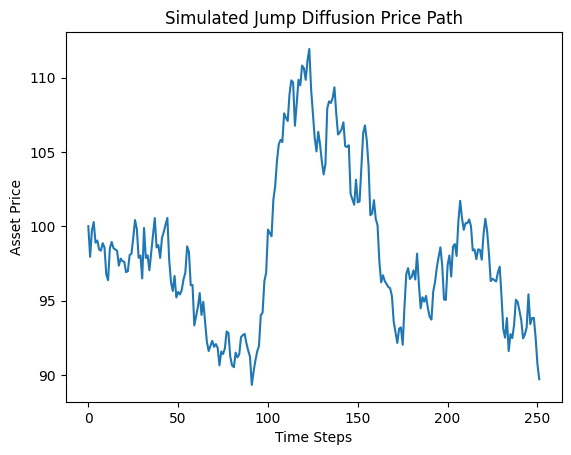

In [1]:
import numpy as np
import scipy.stats as stats

def simulate_jump_diffusion(S0, mu, sigma, lamb, m, v, T, N):
    dt = T / N
    jump_diffusion = np.zeros(N)
    jump_diffusion[0] = S0

    for i in range(1, N):
        Z = np.random.normal(0, 1)
        J = np.random.normal(m, np.sqrt(v))
        Nt = np.random.poisson(lamb * dt)

        dS = (mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z + Nt * J
        jump_diffusion[i] = jump_diffusion[i-1] * np.exp(dS)

    return jump_diffusion

def jump_diffusion_call_option(S0, K, r, T, sigma, lamb, m, v, N_sim):
    payoff = np.zeros(N_sim)

    for i in range(N_sim):
        ST = simulate_jump_diffusion(S0, r, sigma, lamb, m, v, T, 1)[-1]
        payoff[i] = max(0, ST - K)

    call_price = np.exp(-r * T) * np.mean(payoff)
    return call_price

# Testable Example

# Parameters
S0 = 100      # Initial stock price
K = 100       # Strike price
r = 0.05      # Risk-free rate
T = 1         # Time to maturity in years
sigma = 0.2   # Volatility
lamb = 0.75   # Average frequency of jumps per year
m = -0.1      # Mean of jump size
v = 0.3       # Variance of jump size
N_sim = 10000 # Number of simulations

# Call option pricing
call_price = jump_diffusion_call_option(S0, K, r, T, sigma, lamb, m, v, N_sim)
print(f"The estimated call option price is: {call_price:.2f}")

# Simulate the price path for visualization (optional)
import matplotlib.pyplot as plt

N = 252  # Number of time steps (daily for one year)
price_path = simulate_jump_diffusion(S0, r, sigma, lamb, m, v, T, N)

plt.plot(price_path)
plt.title('Simulated Jump Diffusion Price Path')
plt.xlabel('Time Steps')
plt.ylabel('Asset Price')
plt.show()